In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy
import re
import datetime as dt

sns.set_theme(style="whitegrid")

In [ ]:
df = pd.read_csv('crazy_monkey.csv')

In [ ]:
df.shape

(41726, 21)

In [ ]:
df.isna().sum()

dummy              0
order_id           0
parent_id          0
user_id            0
price              0
quantity           0
product_id         0
size_id            0
category_id        0
cat_type        1552
subtype         1552
gender          1552
subclass        1552
neck            1552
sleeve          1552
material        1552
product_type    1552
prod_name          0
created_at         0
city               0
state             25
dtype: int64

In [ ]:
df.quantity.unique()

array([1])

In [ ]:
df.gender.isna().sum()

1552

In [ ]:
df.user_id.value_counts()

1654301    110
1653731     67
1682559     34
1675049     29
1635961     21
          ... 
338441       1
260267       1
1624133      1
1661855      1
1088993      1
Name: user_id, Length: 22083, dtype: int64

In [ ]:
df.product_id.value_counts()

53238    697
62304    512
10528    479
10522    406
26898    321
        ... 
20900      1
4936       1
5456       1
4484       1
24164      1
Name: product_id, Length: 4778, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,dummy,order_id,parent_id,user_id,price,quantity,product_id,size_id,category_id,cat_type,...,gender,subclass,neck,sleeve,material,product_type,prod_name,created_at,city,state
0,27288,3550739,0,44879,1000,1,34584,19,382,Accessories,...,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,OnePlus One Mobile Covers,01-01-2016 00:07,Mumbai,Maharashtra
1,38337,3550743,0,1627343,1000,1,61354,3,622,Apparel,...,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Henley Fullsleeve T-Shirts,01-01-2016 00:11,Mumbai,Maharashtra
2,29144,3550745,0,1221355,1000,1,26898,4,456,Apparel,...,Men,Pyjamas,-1,-1,100% Cotton,Pyjamas,Men's Plain Pyjamas,01-01-2016 00:12,Ghaziabad,Uttar Pradesh
3,16576,3550747,3550745,1221355,1000,1,41284,2,200,Apparel,...,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Full Sleeve T-Shirts,01-01-2016 00:13,Ghaziabad,Uttar Pradesh
4,34189,3550749,3550745,1221355,1000,1,53238,2,570,Apparel,...,Men,T-Shirts,Round Neck,Full,100% Cotton,T-Shirts,Men's Plain Sports Trim Fullsleeve T-Shirt,01-01-2016 00:13,Ghaziabad,Uttar Pradesh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41721,27655,3661031,0,1689335,1000,1,24124,19,410,Accessories,...,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,Samsung Galaxy A5 Mobile Covers,1/30/2016 23:55,Bhopal,Madhya Pradesh
41722,27666,3661033,3661031,1689335,1000,1,24164,19,410,Accessories,...,Unisex,Mobile Covers,-1,-1,Polycarbonate Hard Plastic,Mobile Covers,Samsung Galaxy A5 Mobile Covers,1/30/2016 23:56,Bhopal,Madhya Pradesh
41723,23824,3661037,0,1456719,1000,1,26550,2,348,Apparel,...,Women,T-Shirts,Scoop Neck,3/4th,100% Cotton,T-Shirts,Women's Plain 3/4 Sleeve T-Shirts,1/30/2016 23:58,Bangalore,Karnataka
41724,26768,3661039,0,1686593,1000,1,64826,11,352,Apparel,...,Women,T-Shirts,Scoop Neck,3/4th,100% Cotton,T-Shirts,Women's Printed 3/4 Sleeve T-Shirts,1/30/2016 23:59,BHUBANESWAR,ODISHA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41726 entries, 0 to 41725
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   dummy         41726 non-null  int64 
 1   order_id      41726 non-null  int64 
 2   parent_id     41726 non-null  int64 
 3   user_id       41726 non-null  int64 
 4   price         41726 non-null  int64 
 5   quantity      41726 non-null  int64 
 6   product_id    41726 non-null  int64 
 7   size_id       41726 non-null  int64 
 8   category_id   41726 non-null  int64 
 9   cat_type      40174 non-null  object
 10  subtype       40174 non-null  object
 11  gender        40174 non-null  object
 12  subclass      40174 non-null  object
 13  neck          40174 non-null  object
 14  sleeve        40174 non-null  object
 15  material      40174 non-null  object
 16  product_type  40174 non-null  object
 17  prod_name     41726 non-null  object
 18  created_at    41726 non-null  object
 19  city

In [ ]:
df.city.value_counts()

Mumbai           5848
Bangalore        3878
Pune             2728
Thane            1841
Hyderabad        1655
                 ... 
Surathkal           1
Kanchipuramur       1
Ghansoli            1
Karad               1
Malkapur            1
Name: city, Length: 993, dtype: int64

In [ ]:
def delhi_find(x):
  if re.search('(?i)delhi',x):
    return 'Delhi'
  else:
    return x


df.city = df.city.apply(delhi_find)

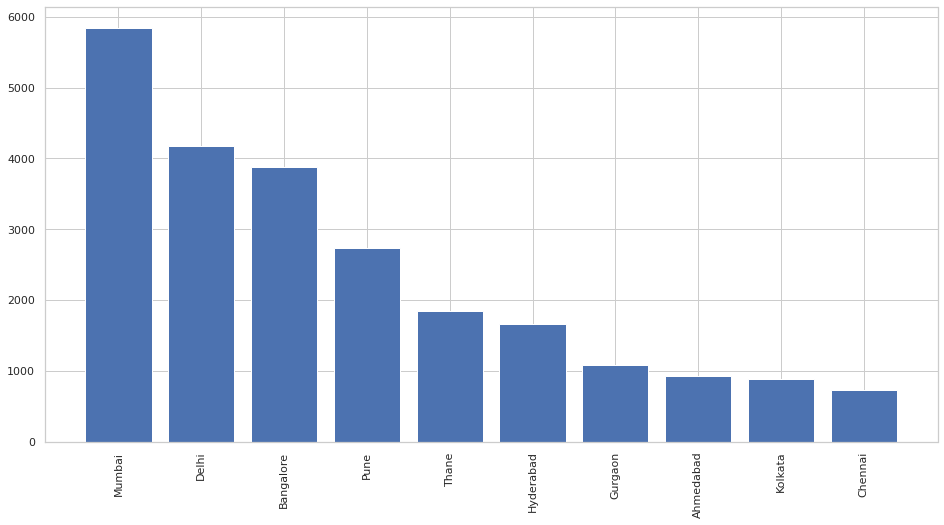

In [ ]:
# 1.	The top 10 cities that the company should target

plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.bar(df['city'].value_counts().head(10).index,df['city'].value_counts().head(10).values)
plt.show()

## The top 3 cities that company should target will be:

1. Mumbai
2. Delhi
3. Banglore

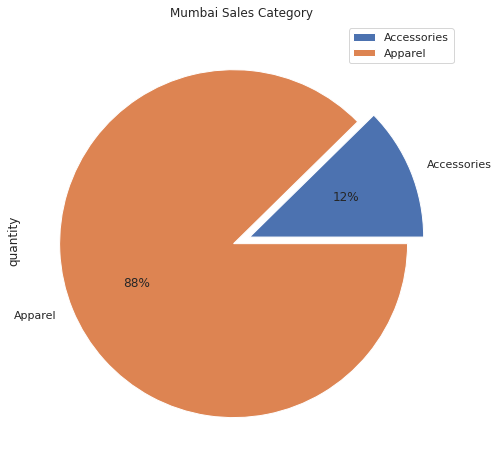

In [ ]:
explode = (0.05, 0.05)
df[df.city == 'Mumbai'].groupby(['cat_type']).count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='Mumbai Sales Category')


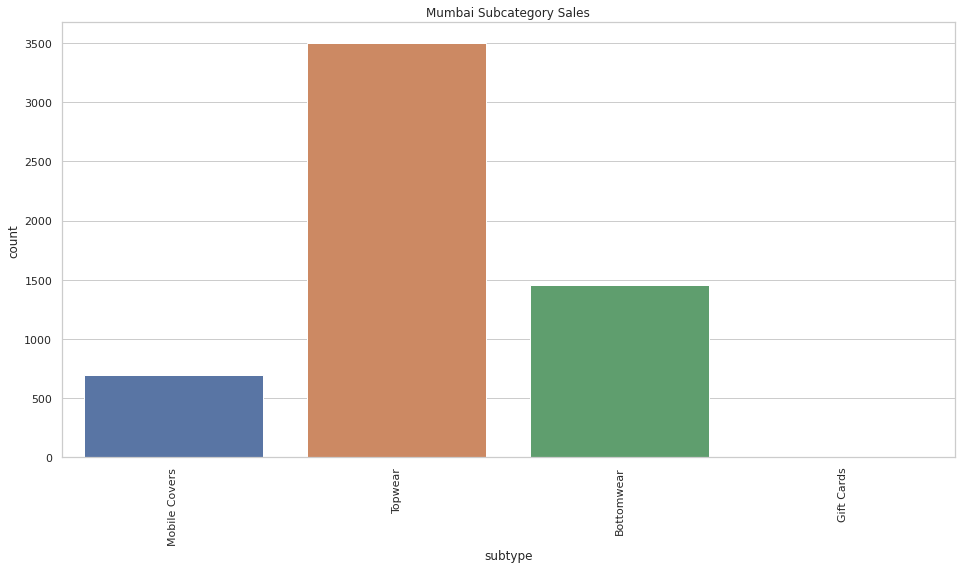

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Mumbai Subcategory Sales")
sns.countplot(x=df[df.city == 'Mumbai']['subtype'])

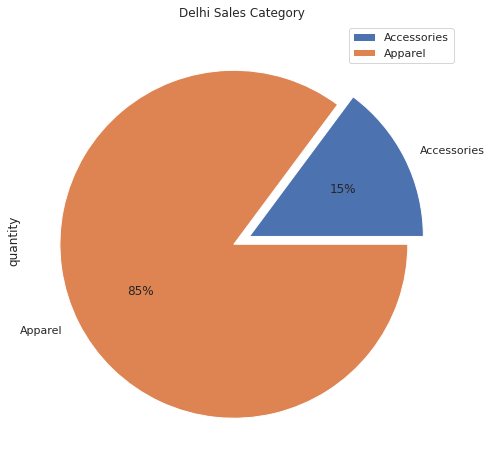

In [ ]:
explode = (0.05, 0.05)
df[df.city == 'Delhi'].groupby(['cat_type']).count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='Delhi Sales Category')


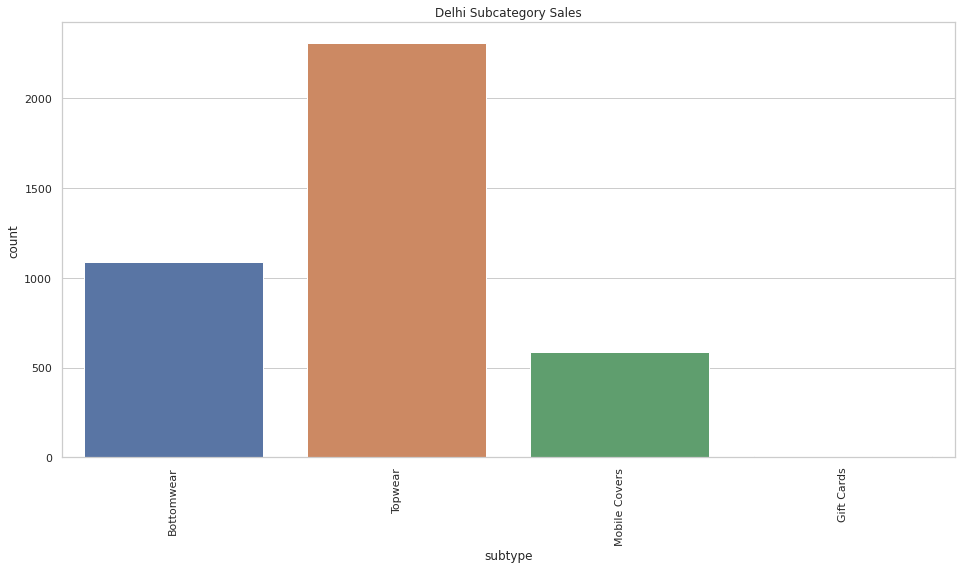

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Delhi Subcategory Sales")
sns.countplot(x=df[df.city == 'Delhi']['subtype'])

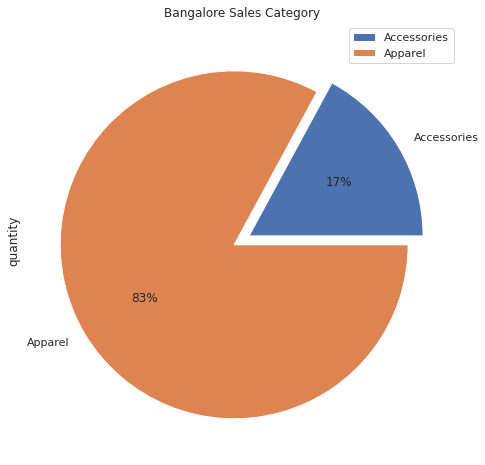

In [ ]:
explode = (0.05, 0.05)
df[df.city == 'Bangalore'].groupby(['cat_type']).count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='Bangalore Sales Category')


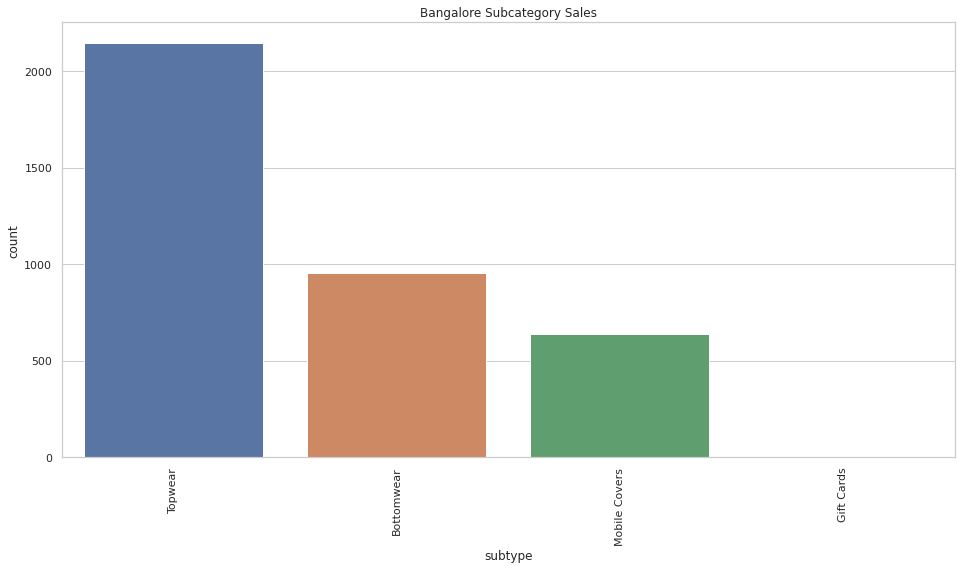

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Bangalore Subcategory Sales")
sns.countplot(x=df[df.city == 'Bangalore']['subtype'])


## Top Categories in Top Cities:
1. Mumbai - Apparel and Accessories
2. Delhi - Apparel and Accessories
3. Bangalore - Appare and Accessories

## Top Subcategories in Top Cities:

1. Mumbai - Topwear
2. Delhi - Topwear
3. Bangalore - Topwear

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


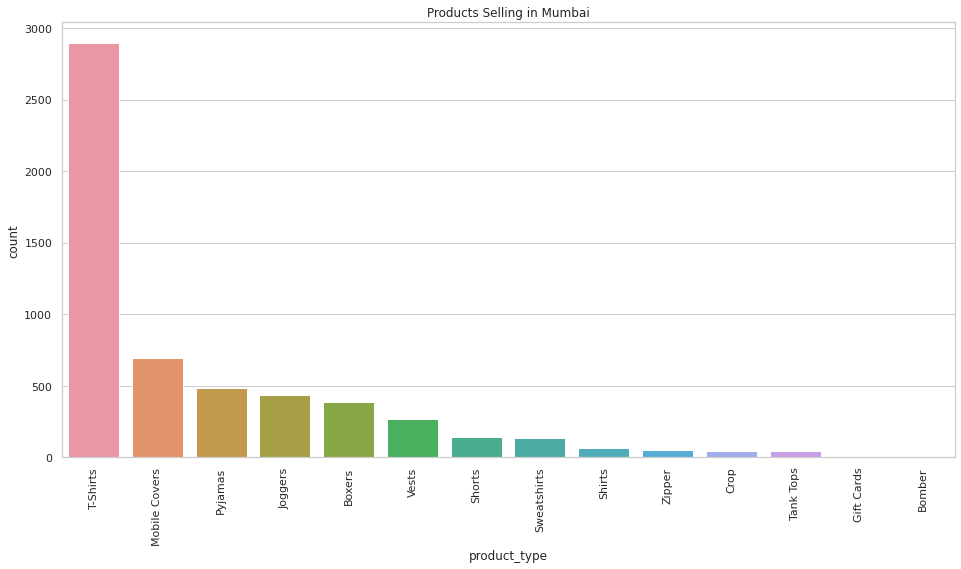

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Products Selling in Mumbai")
sns.countplot(df[df.city == 'Mumbai']['product_type'],order=df[df.city == 'Mumbai']['product_type'].value_counts().index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


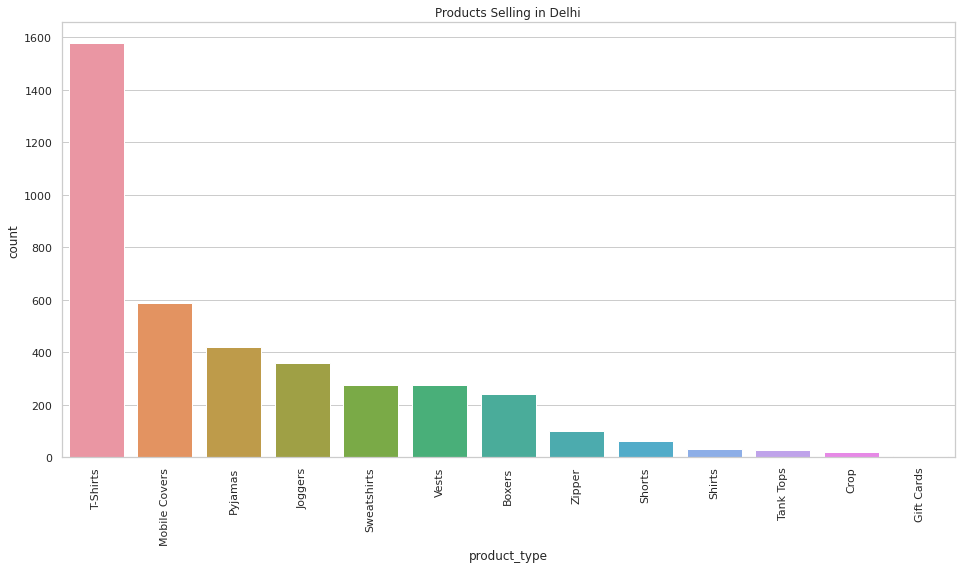

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Products Selling in Delhi")
sns.countplot(df[df.city == 'Delhi']['product_type'],order=df[df.city == 'Delhi']['product_type'].value_counts().index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


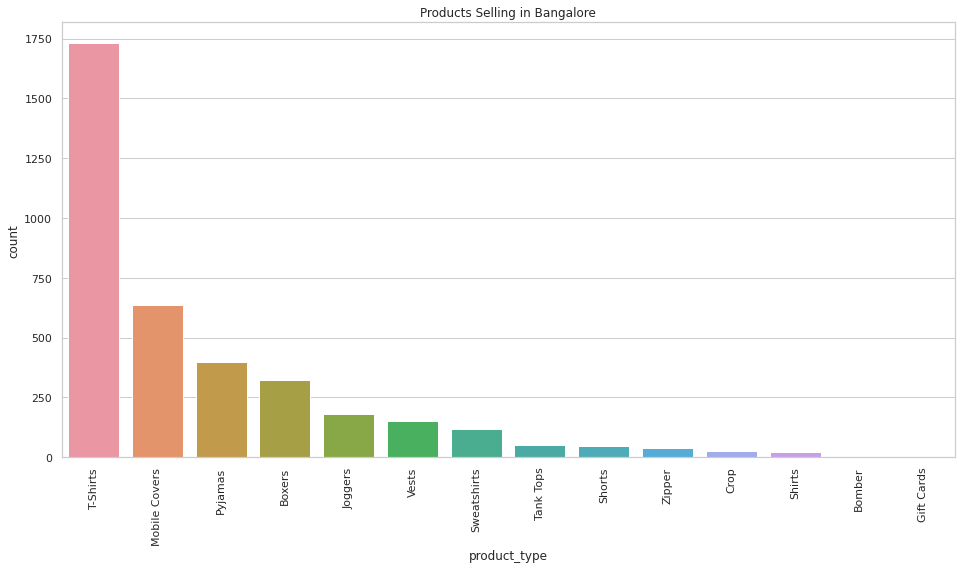

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Products Selling in Bangalore")
sns.countplot(df[df.city == 'Bangalore']['product_type'],order=df[df.city == 'Bangalore']['product_type'].value_counts().index)

## Best Selling Product in Top Cities:

1. T-Shirts
2. Mobile Covers
3. Pyjamas

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


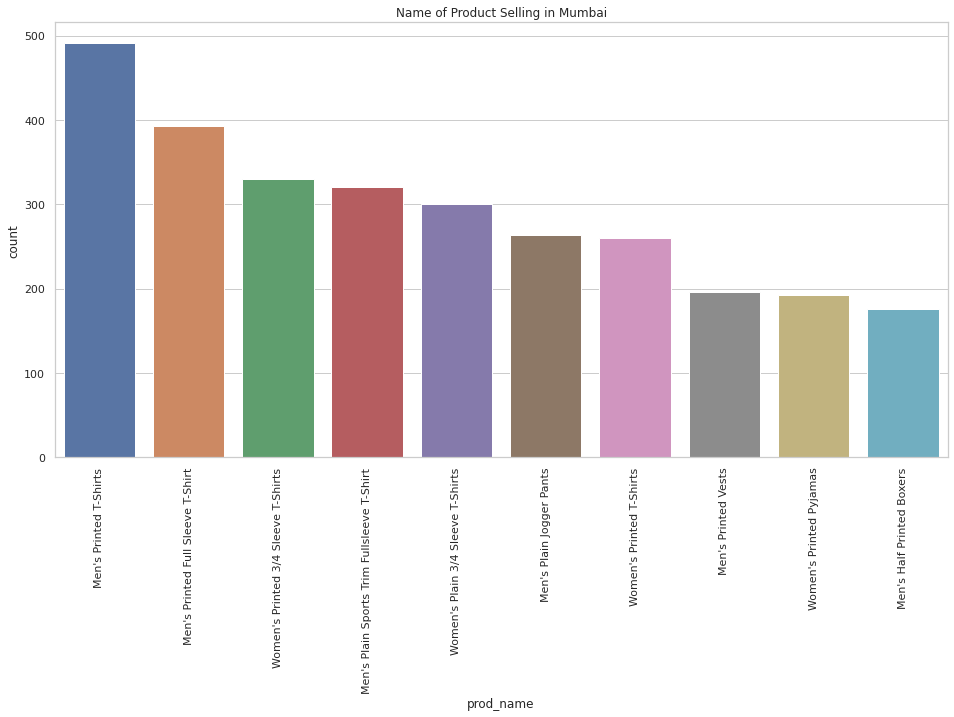

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Name of Product Selling in Mumbai")
sns.countplot(df[df.city == 'Mumbai']['prod_name'],order=df[df.city == 'Mumbai']['prod_name'].value_counts().head(10).index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


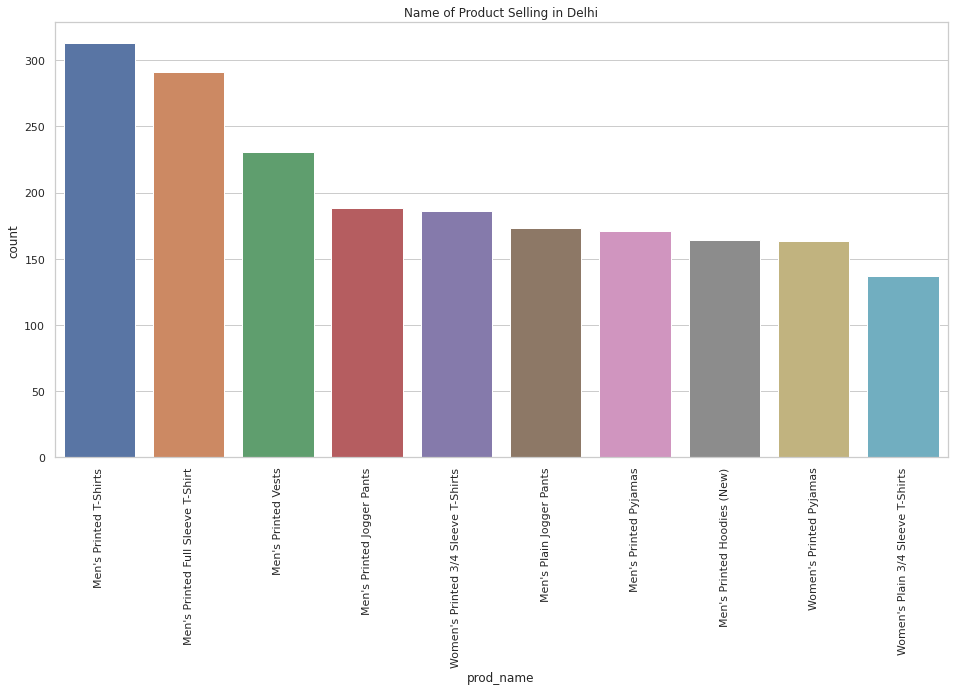

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Name of Product Selling in Delhi")
sns.countplot(df[df.city == 'Delhi']['prod_name'],order=df[df.city == 'Delhi']['prod_name'].value_counts().head(10).index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


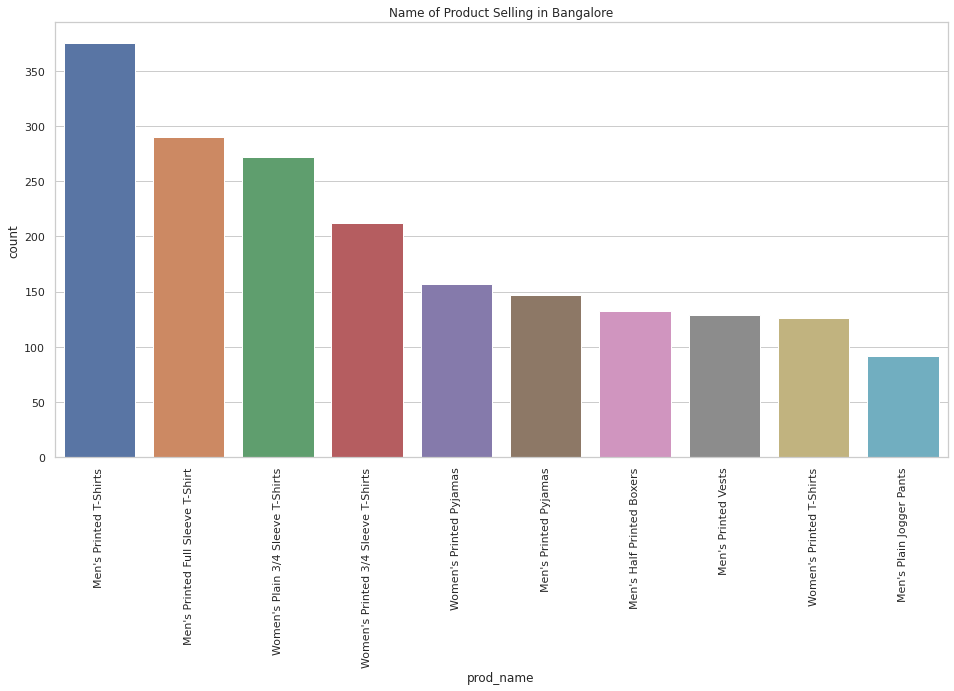

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Name of Product Selling in Bangalore")
sns.countplot(df[df.city == 'Bangalore']['prod_name'],order=df[df.city == 'Bangalore']['prod_name'].value_counts().head(10).index)

## Top product name selling in top cities:
1. Mumbai - T-Shirts (Men's Printed T-Shirts)
2. Delhi - T-Shirts (Men's Printed T-Shirts)
3. Bangalore - T-Shirts (Men's Printed T-Shirts)

In [ ]:
df.created_at = pd.to_datetime(df['created_at'])

In [ ]:
df['day_of_week'] = df.created_at.dt.day_name()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


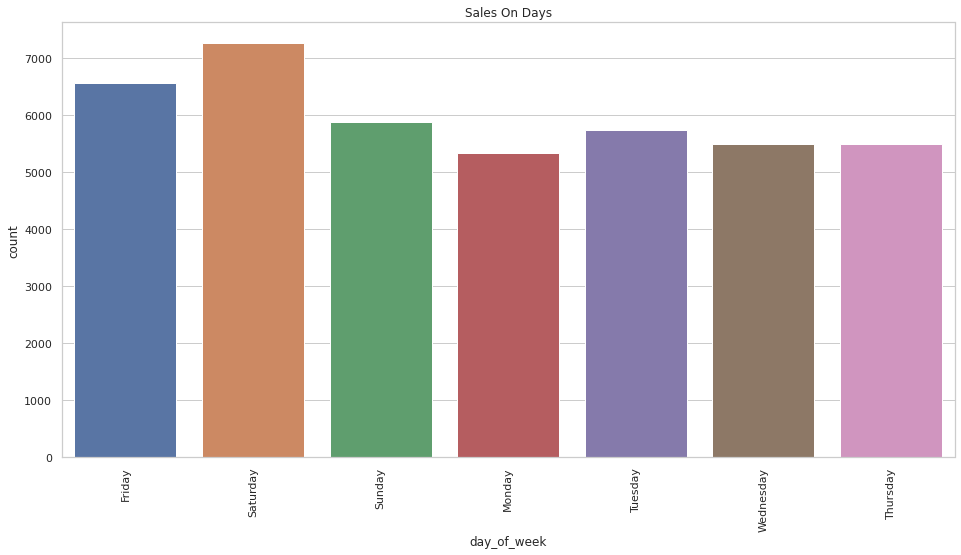

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Sales On Days")
sns.countplot(df['day_of_week'])

## Day-wise Sales:

- Most Sales Happen on Friday,Saturday and Sunday compared to other Weekdays

In [ ]:
df['time_of_order'] = df.created_at.dt.time
df['time_in_hour'] = df.created_at.dt.hour

[Text(0, 0.5, 'Number of Orders'), Text(0.5, 0, 'Time In Hour')]

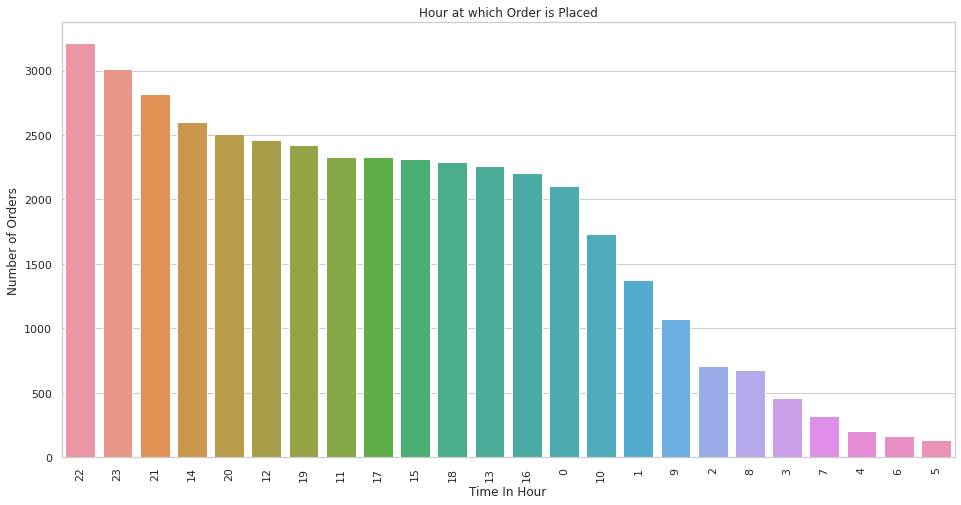

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Hour at which Order is Placed")
fig = sns.countplot(x=df['time_in_hour'],order=df['time_in_hour'].value_counts().index)
fig.set(xlabel='Time In Hour', ylabel='Number of Orders')

## Insights:

- Most of the orders are placed either late at night or in afternoon 

In [ ]:
df['day_of_month'] = df.created_at.dt.day

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


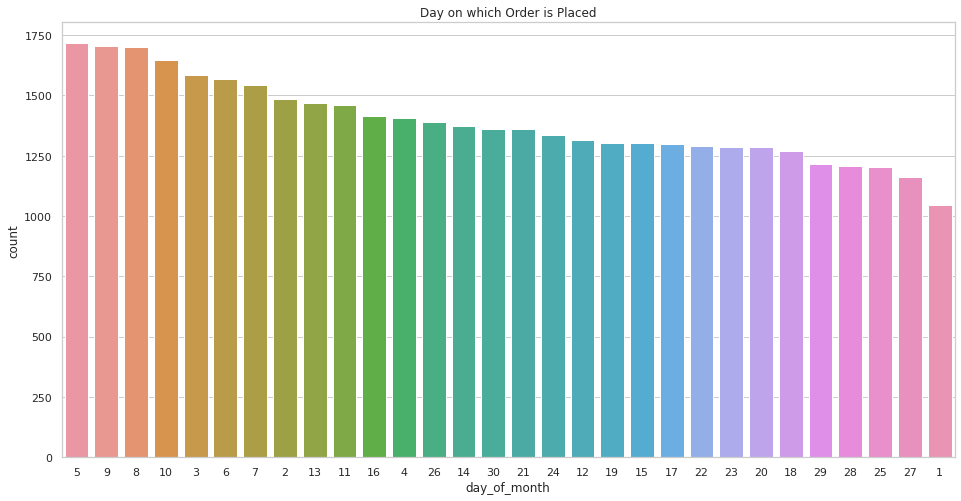

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Day on which Order is Placed")
sns.countplot(df['day_of_month'],order=df['day_of_month'].value_counts().index)

## Insights:

- 5th of January has the largest sales

# RFM Analysis

## Recency

In [ ]:
df_recency = df.groupby(by='user_id',
                        as_index=False)['created_at'].max()
recent_date = df_recency['created_at'].max()
df_recency['Recency'] = df_recency['created_at'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()

,user_id,created_at,Recency
0,18,2016-01-20 17:19:00,10
1,26,2016-01-29 11:19:00,1
2,79,2016-01-04 17:14:00,26
3,229,2016-01-09 16:04:00,21
4,358,2016-01-10 11:32:00,20


## Frequency

In [ ]:
frequency_df = df.groupby(['user_id'], as_index=False)['created_at'].count()
frequency_df.columns = ['user_id', 'Frequency']
frequency_df.head()

,user_id,Frequency
0,18,1
1,26,6
2,79,3
3,229,1
4,358,1


## Monetary

In [ ]:
df['Total'] = df['price']*df['quantity']
monetary_df = df.groupby('user_id', as_index=False)['Total'].sum()
monetary_df.columns = ['user_id', 'Monetary']
monetary_df.head()

,user_id,Monetary
0,18,1000
1,26,6000
2,79,3000
3,229,1000
4,358,1000


# Returning Customers RFM Analysis

In [ ]:
rf_df = df_recency.merge(frequency_df, on='user_id')
rfm_df = rf_df.merge(monetary_df, on='user_id').drop(
    columns='created_at')


returning_df = rfm_df[rfm_df.Frequency > 1]
returning_df.head()

,user_id,Recency,Frequency,Monetary
1,26,1,6,6000
2,79,26,3,3000
5,1113,4,2,2000
7,1234,16,3,3000
8,1994,5,4,4000


In [ ]:
recency_sorted_df = returning_df.sort_values(by='Recency', ascending=True)
recency_sorted_df

,user_id,Recency,Frequency,Monetary
22082,1689349,0,2,2000
9977,1566961,0,2,2000
10034,1569481,0,3,3000
10093,1572689,0,2,2000
10107,1573593,0,3,3000
...,...,...,...,...
5893,1189021,29,2,2000
11487,1624065,29,3,3000
8140,1450745,29,2,2000
8462,1474849,29,3,3000


In [ ]:
recency_sorted_df.sort_values(by=['Frequency','Monetary'], ascending=False)

,user_id,Recency,Frequency,Monetary
16496,1654301,3,110,110000
16396,1653731,3,67,67000
21046,1682559,2,34,34000
19901,1675049,6,29,29000
13158,1635961,19,21,21000
...,...,...,...,...
5899,1189837,29,2,2000
11446,1623177,29,2,2000
5893,1189021,29,2,2000
8140,1450745,29,2,2000


In [ ]:
top_returning_cust = recency_sorted_df.sort_values(by=['Frequency','Monetary'], ascending=False).head(10)
top_returning_cust

,user_id,Recency,Frequency,Monetary
16496,1654301,3,110,110000
16396,1653731,3,67,67000
21046,1682559,2,34,34000
19901,1675049,6,29,29000
13158,1635961,19,21,21000
74,9827,3,20,20000
796,122846,15,19,19000
10640,1596525,22,19,19000
219,34475,1,18,18000
5454,1122801,3,18,18000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


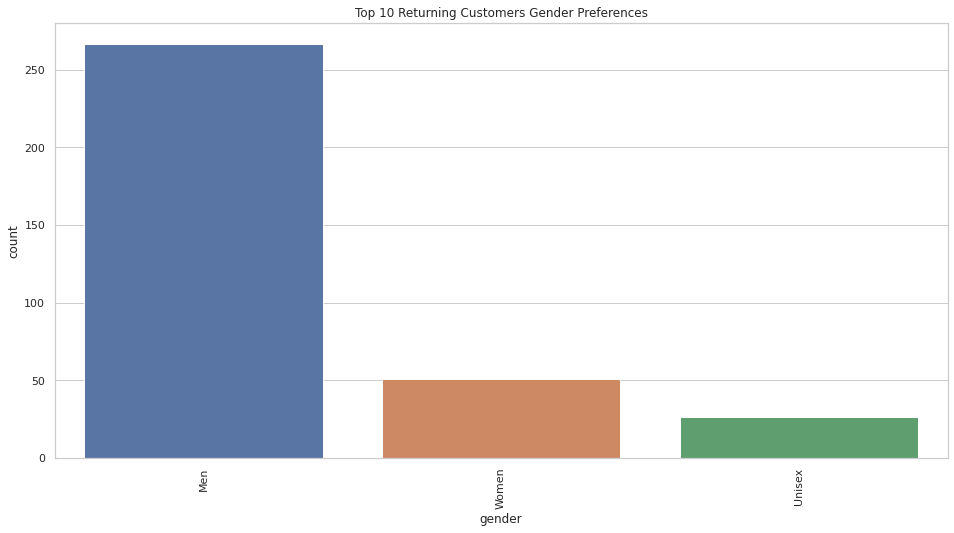

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Top 10 Returning Customers Gender Preferences")
sns.countplot(top_returning_cust.merge(df,how='inner', on='user_id')['gender'])


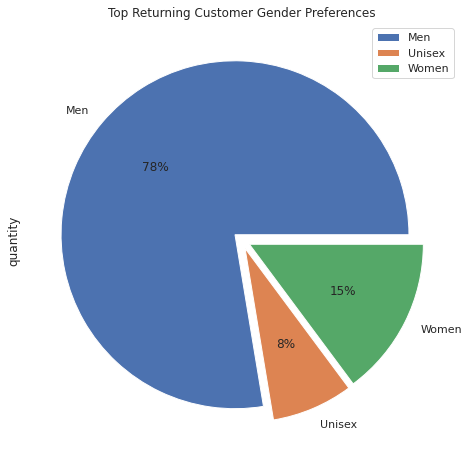

In [ ]:
explode =(0.05,0.05,0.05)
top_returning_cust.merge(df,how='inner', on='user_id').groupby(['gender']).count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='Top Returning Customer Gender Preferences')

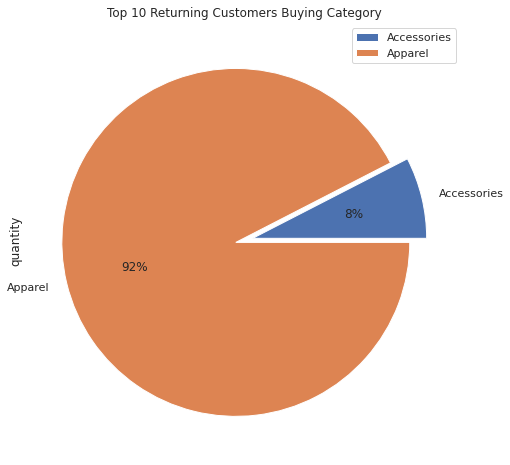

In [ ]:
explode=(0.05,0.05)
top_returning_cust.merge(df,how='inner', on='user_id').groupby(['cat_type']).count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='Top 10 Returning Customers Buying Category')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


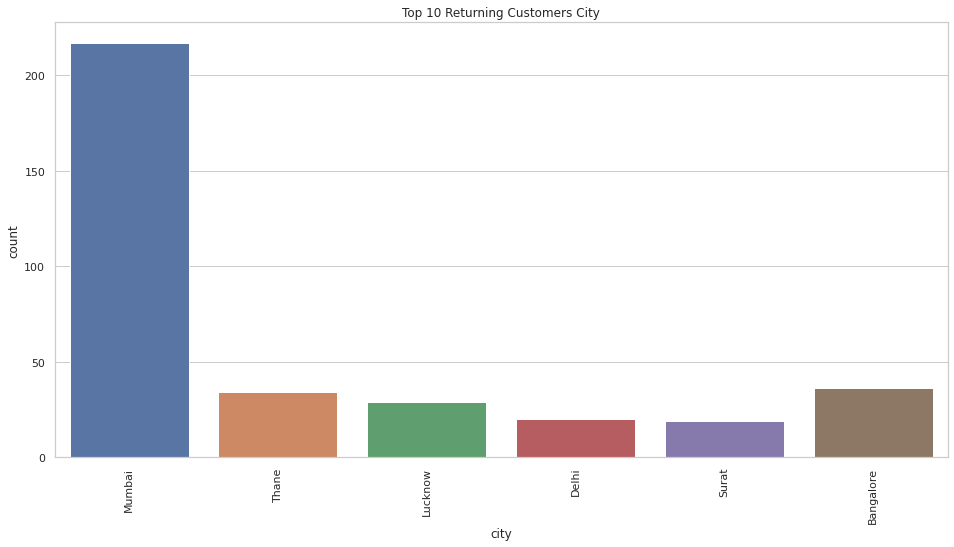

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Top 10 Returning Customers City")
sns.countplot(top_returning_cust.merge(df,how='inner', on='user_id')['city'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


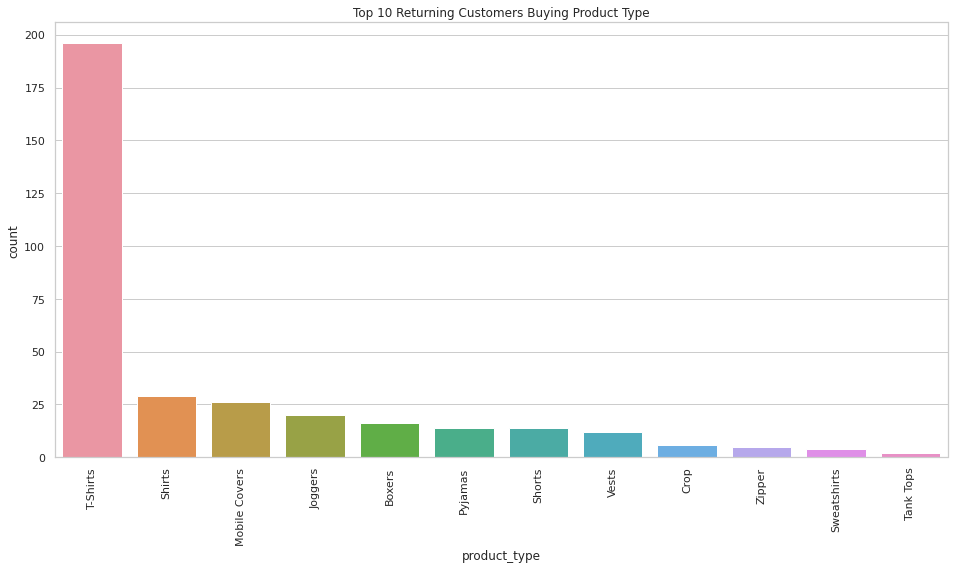

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Top 10 Returning Customers Buying Product Type")
plot_df = top_returning_cust.merge(df,how='inner', on='user_id')['product_type']
sns.countplot(plot_df,order=plot_df.value_counts().index)


## Top 10 Returning Customers details:

1. Gender preference -> men
2. Usually shops for -> Aparrels (Topwear -> T-Shirts)
5. Most Returing Customer's City -> Mumbai


## Returning Customers Time of Buying

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


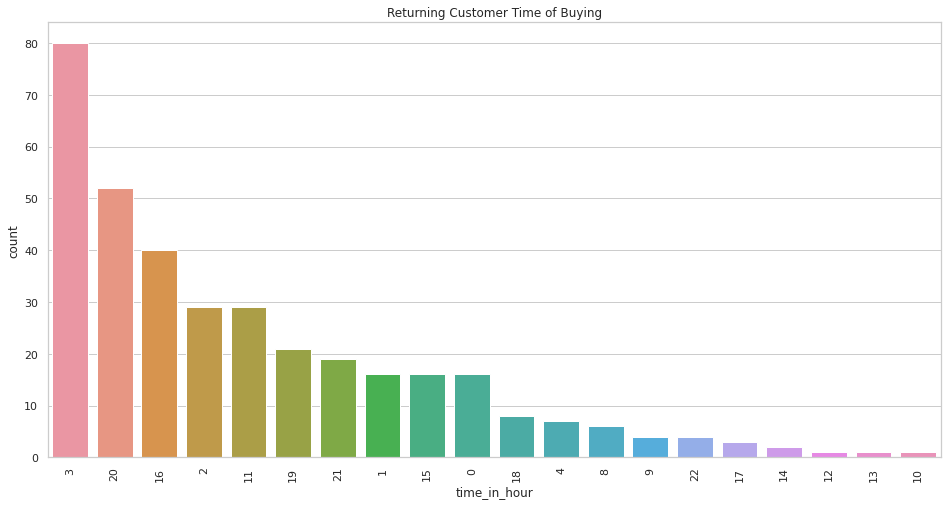

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ret_df = top_returning_cust.merge(df,how='inner', on='user_id')
plt.title("Returning Customer Time of Buying")
sns.countplot(ret_df['time_in_hour'],order=ret_df['time_in_hour'].value_counts().index)

## Returning Customer Day of Month of Buying

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


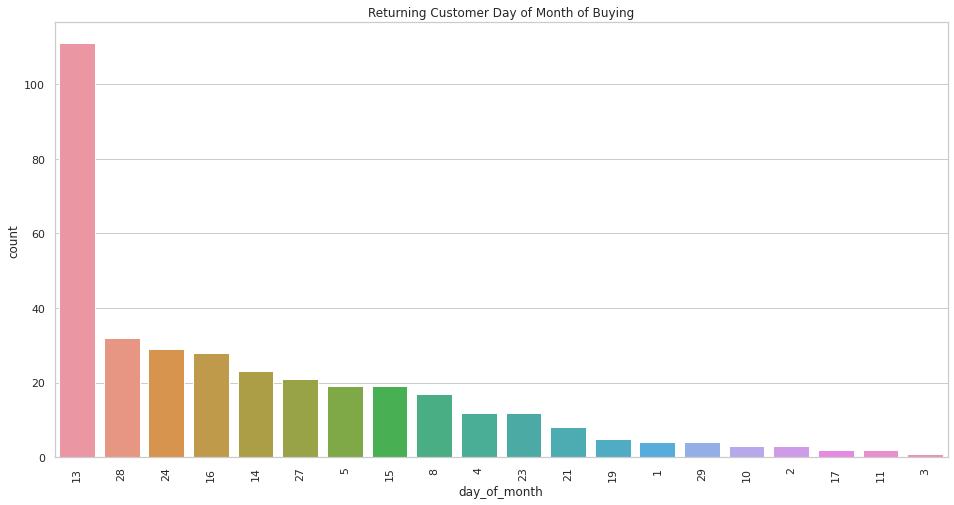

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ret_df = top_returning_cust.merge(df,how='inner', on='user_id')
plt.title("Returning Customer Day of Month of Buying")
sns.countplot(ret_df['day_of_month'],order=ret_df['day_of_month'].value_counts().index)

# New Customers

In [ ]:
new_df = rfm_df[rfm_df.Frequency == 1]

In [ ]:
new_df

,user_id,Recency,Frequency,Monetary
0,18,10,1,1000
3,229,21,1,1000
4,358,20,1,1000
6,1209,3,1,1000
11,2516,27,1,1000
...,...,...,...,...
22075,1689289,0,1,1000
22076,1689295,0,1,1000
22078,1689329,0,1,1000
22079,1689331,0,1,1000


In [ ]:
new_cust_df = new_df.merge(df,how='inner',on='user_id')
new_cust_df

,user_id,Recency,Frequency,Monetary,dummy,order_id,parent_id,price,quantity,product_id,...,product_type,prod_name,created_at,city,state,day_of_week,time_of_order,time_in_hour,day_of_month,Total
0,18,10,1,1000,26614,3625289,0,1000,1,62700,...,T-Shirts,Women's Printed 3/4 Sleeve T-Shirts,2016-01-20 17:19:00,Dhule,Maharashtra,Wednesday,17:19:00,17,20,1000
1,229,21,1,1000,23920,3584751,0,1000,1,26550,...,T-Shirts,Women's Plain 3/4 Sleeve T-Shirts,2016-01-09 16:04:00,Delhi,Delhi,Saturday,16:04:00,16,9,1000
2,358,20,1,1000,17967,3587799,0,1000,1,41560,...,NaN,Men's Printed Panel T-Shirts,2016-01-10 11:32:00,indore,NaN,Sunday,11:32:00,11,10,1000
3,1209,3,1,1000,33161,3648755,0,1000,1,62368,...,Mobile Covers,OnePlus Two Mobile Covers,2016-01-27 12:14:00,Chandigarh,Chandigarh,Wednesday,12:14:00,12,27,1000
4,2516,27,1,1000,28815,3557551,0,1000,1,26892,...,NaN,Men's Printed Panel Vests,2016-01-03 00:21:00,Bellary,Karnataka,Sunday,00:21:00,0,3,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12273,1689289,0,1,1000,7694,3660911,0,1000,1,57970,...,T-Shirts,Men's Printed Full Sleeve T-Shirt,2016-01-30 23:28:00,Nainital,Uttarakhand,Saturday,23:28:00,23,30,1000
12274,1689295,0,1,1000,40016,3660913,0,1000,1,62600,...,Joggers,Men's Plain Jogger Pants,2016-01-30 23:30:00,Kolkata,West Bengal,Saturday,23:30:00,23,30,1000
12275,1689329,0,1,1000,21527,3660983,0,1000,1,44721,...,Vests,Men's Printed Vests,2016-01-30 23:45:00,Malkapur,Maharashtra,Saturday,23:45:00,23,30,1000
12276,1689331,0,1,1000,37076,3660989,0,1000,1,55236,...,Mobile Covers,Moto X Play Mobile Covers,2016-01-30 23:48:00,MUMBAI,Maharashtra,Saturday,23:48:00,23,30,1000


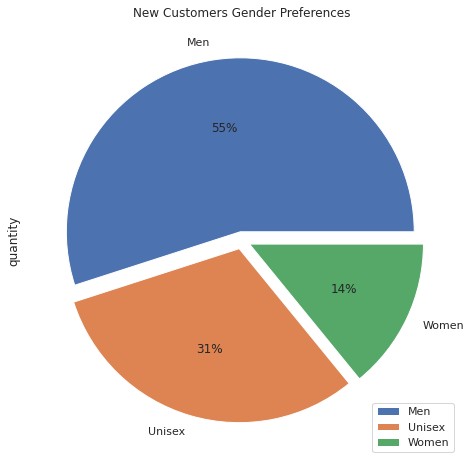

In [ ]:
explode=(0.05,0.05,0.05)
new_cust_df.groupby('gender').count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='New Customers Gender Preferences')

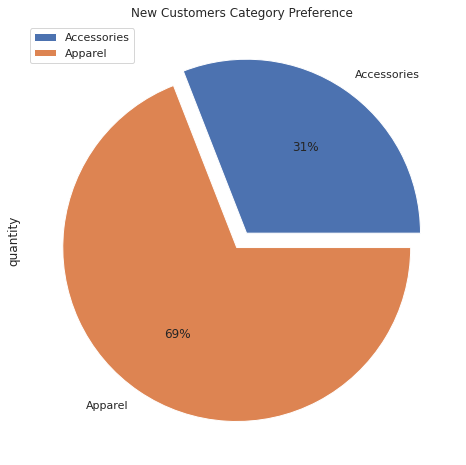

In [ ]:
explode = (0.05,0.05)
new_cust_df.groupby('cat_type').count().plot(kind='pie',y='quantity',autopct='%1.0f%%',explode=explode, figsize=(16,8), title='New Customers Category Preference')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


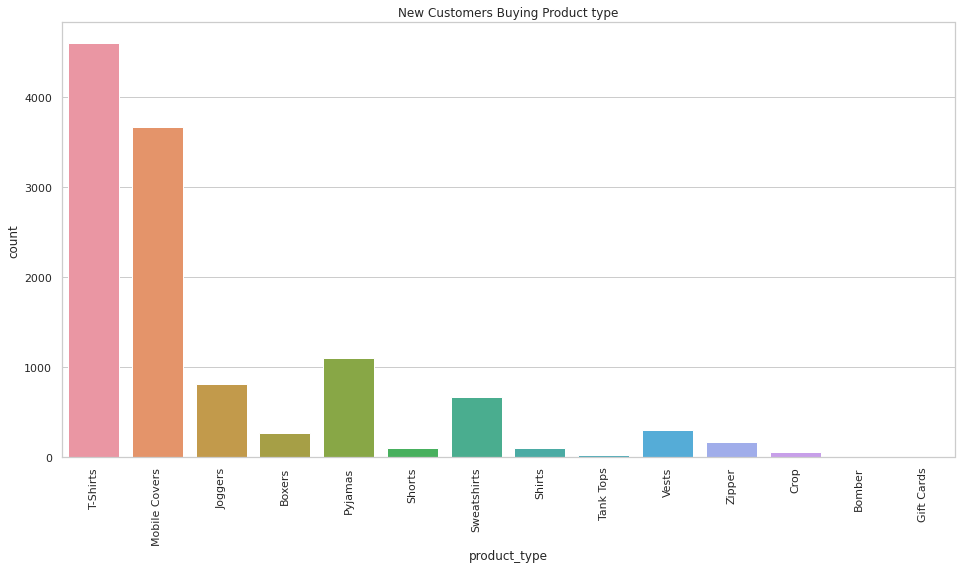

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("New Customers Buying Product type")
sns.countplot(new_cust_df['product_type'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


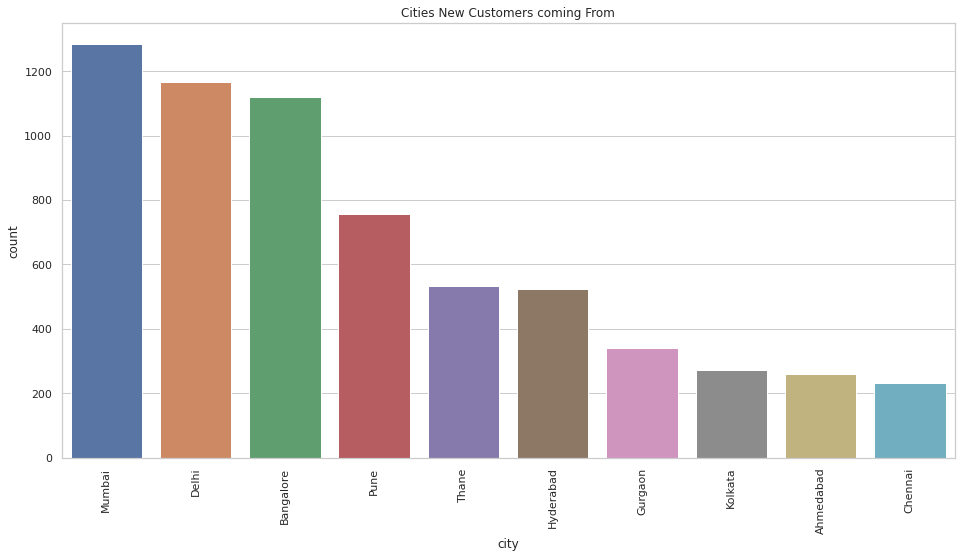

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Cities New Customers coming From")
sns.countplot(new_cust_df['city'],order=new_cust_df['city'].value_counts().head(10).index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


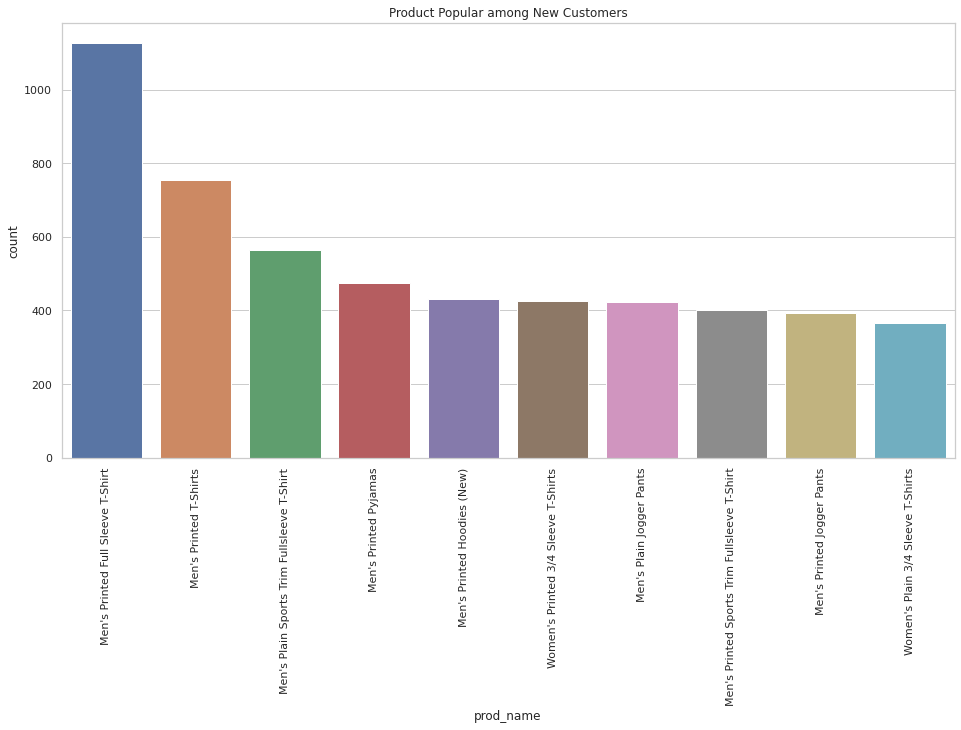

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("Product Popular among New Customers")
sns.countplot(new_cust_df['prod_name'],order=new_cust_df['prod_name'].value_counts().head(10).index)

## New Customer Time of Buying

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


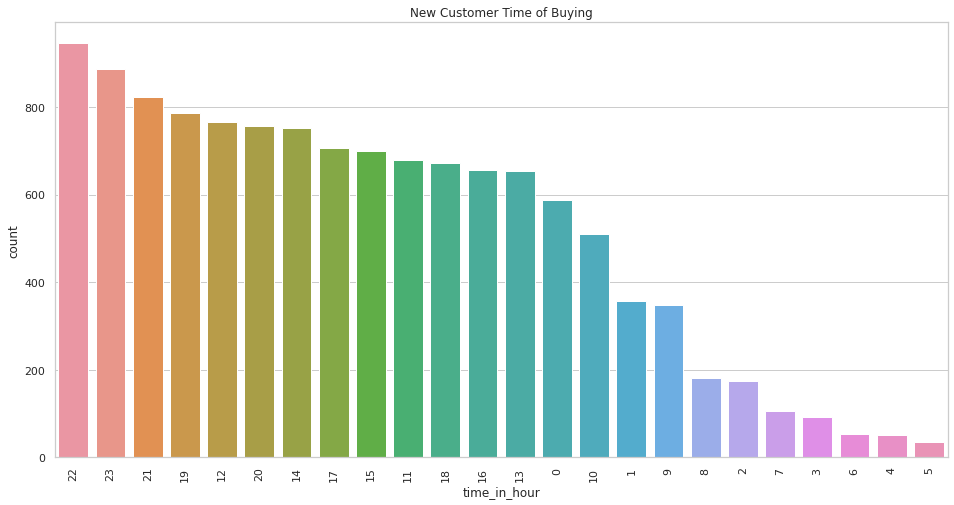

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("New Customer Time of Buying")
sns.countplot(new_cust_df['time_in_hour'],order=new_cust_df['time_in_hour'].value_counts().index)

## New Customers Day of Month of Buying

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


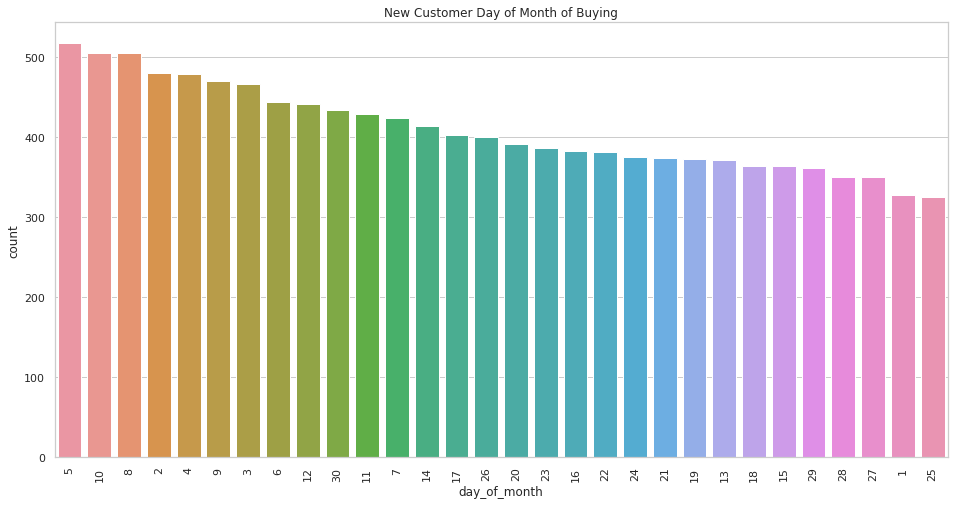

In [ ]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
plt.title("New Customer Day of Month of Buying")
sns.countplot(new_cust_df['day_of_month'],order=new_cust_df['day_of_month'].value_counts().index)

## New Customer Insights:

1. Coming for apparels -> topwear -> T-Shirts and mobile covers
2. Majority people shopping for Men
3. Coming From Top cities Mumbai,Delhi and Bangalore

# Answer to Questions:

1. Is it fine to launch offers on weekdays or weekends?
- As Most of our Sales Happen on the weekends it benificial to launch offers on weekends.

2. Which day of the month gets them the best sales?
- 5th of January is the day on which most sales happen.

3. At what time of the day their website gets the maximum impressions?
- Maximum impressions that the website got is at late night around 22 hour or 10 pm

4. Are men placing more orders than women?
- Yes, Most of the orders that are placed on our website are for Men which includes new as well as returning customers.

5. Is it a good idea for the company to open an offline store at this early stage of its startup journey?
- Yes, it is a good idea for the company to start an offline store in Mumbai with its highest sales and should sell men's t-shirts in the store for the growth.